### The Hard? way

#### The get_groups function

In some situation you may not require to instantiate all the models supported
by `ugropy`, for that, you can search the model's groups individually.

In [1]:
from ugropy import joback, psrk, unifac, get_groups

hexane = get_groups(unifac, "hexane")
nicotine = get_groups(psrk, "nicotine")
limonene = get_groups(joback, "limonene")

print(hexane.subgroups)
print(nicotine.subgroups)
print(limonene.subgroups)

{'CH3': 2, 'CH2': 4}
{'CH2': 3, 'CH3N': 1, 'C5H4N': 1, 'CH': 1}
{'-CH3': 2, '=CH2': 1, '=C<': 1, 'ring-CH2-': 3, 'ring>CH-': 1, 'ring=CH-': 1, 'ring=C<': 1}


Also, you can visualize the fragmentation results as in the "easy way" tutorial

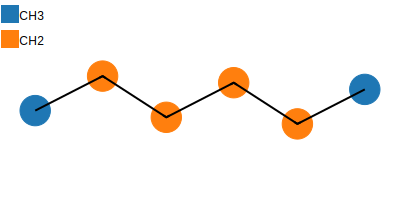

In [2]:
from IPython.display import SVG

SVG(hexane.draw())

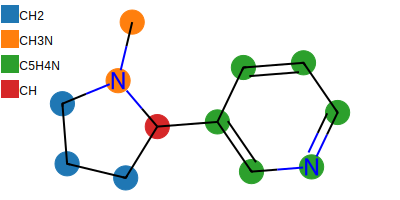

In [3]:
SVG(nicotine.draw())

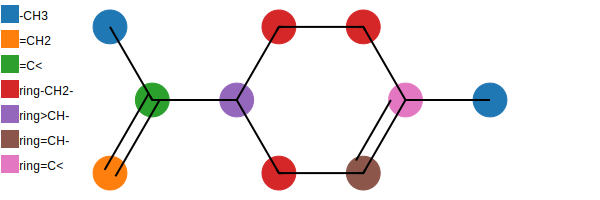

In [4]:
SVG(limonene.draw(width=600))

The `get_groups` function have the signature:

In [5]:
get_groups(
    model=psrk,
    identifier="nicotine",
    identifier_type="name"
);

As in the `Groups` class you can use "name", "smiles" or "mol" as identifier
type. This can be useful for whatever you are doing and skip the overhead of
setting models that you don't want. The `Groups` class is pretended to be used
when you think: "I want all of this molecule". The fragmentation_model 
parameters represents an ugropy fragmentation model.

In [6]:
from ugropy import FragmentationModel

#### Joback

For context, check the Joback's article:
https://doi.org/10.1080/00986448708960487

The `JobackProperties` object is instantiated by the Group object, as we saw in
the previous tutorial. However, a `JobackProperties` object can also be
instantiated individually:

In [7]:
from ugropy.properties import JobackProperties

joback_carvone = JobackProperties("carvone")

joback_carvone.g_formation

34.800000000000004

As with a `Groups` object, the signature of a `Joback` object is as follows
similarly, in the `Groups` class, you can use "name," "smiles," or "mol" as the
identifier type with the addition that you can provide the Joback's functional
groups as a dictionary directly:

In [8]:
carvone  = JobackProperties(
    identifier="carvone",
    identifier_type="name",
    normal_boiling_point=None
)

In [9]:
hex_g = JobackProperties(identifier={"-CH3": 2, "-CH2-": 4}, identifier_type="groups")

hex_n = JobackProperties(identifier="hexane", identifier_type="name")

print(hex_g.critical_pressure)
print(hex_n.critical_pressure)

31.070992245923176
31.070992245923176


The normal_boiling_temperature parameter, if provided, is used in the Joback
properties calculations instead of the Joback-estimated normal boiling
temperature. Let's examine an example from the original Joback's article:

In [10]:
mol = JobackProperties("p-dichlorobenzene")

print(f"Estimated normal boiling point: {mol.normal_boiling_point} K")
print(f"Critical temperature: {mol.critical_temperature} K")

Estimated normal boiling point: 443.4 K
Critical temperature: 675.1671746814928 K


The critical temperature necessitates the estimation of the normal boiling
point. Joback recommends that if the experimental value of the normal boiling
point is known, it should be used instead of the estimated value.

In [11]:
mol = JobackProperties("p-dichlorobenzene", normal_boiling_point=447.3)

print(f"Experimental normal boiling point: {mol.exp_nbt} K")
print(f"Estimated normal boiling point: {mol.normal_boiling_point} K")
print(f"Critical temperature: {mol.critical_temperature} K")

Experimental normal boiling point: 447.3 K
Estimated normal boiling point: 443.4 K
Critical temperature: 681.1057222260526 K


The experimental value of the critical temperature for p-dichlorobenzene is 685
K. In this example, the error is not significant, but Joback warns that errors
could be more significant in other cases.

Refer to the full documentation of the Joback object for information on units
and further explanation.

In [12]:
JobackProperties?

Init signature:
JobackProperties(
    identifier: str,
    identifier_type: str = 'name',
    normal_boiling_point: float = None,
) -> None
Docstring:     
Joback [1] group contribution properties estimator.

Parameters
----------
identifier : str or rdkit.Chem.rdchem.Mol
    Identifier of a molecule (name, SMILES, groups, or Chem.rdchem.Mol).
    Example: you can use hexane, CCCCCC, {"-CH3": 2, "-CH2-": 4} for name,
    SMILES and groups respectively.
identifier_type : str, optional
    Use 'name' to search a molecule by name, 'smiles' to provide the
    molecule SMILES representation, 'groups' to provide Joback groups or
    'mol' to provide a rdkit.Chem.rdchem.Mol object, by default "name".
normal_boiling_point : float, optional
    If provided, will be used to estimate critical temperature, acentric
    factor, and vapor pressure instead of the estimated normal boiling
    point, by default None.

Attributes
----------
subgroups : dict
    Joback functional groups of the molecule.
